In [1]:
# pip install ucimlrepo

# Data Preparation and Feature Engineering

In [2]:
import warnings
import numpy as np 
import pandas as pd
warnings.filterwarnings("ignore")

In [3]:
# import numpy as np 
# import pandas as pd
# from ucimlrepo import fetch_ucirepo 
  
# online_retail = fetch_ucirepo(id=352) 
  
# X = online_retail.data.features 
# X_with_id = online_retail.data.features.copy()

# for id_col in online_retail.metadata["index_col"]:
#     X_with_id[id_col] = online_retail.data.ids[id_col]

In [4]:
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding="latin1")

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


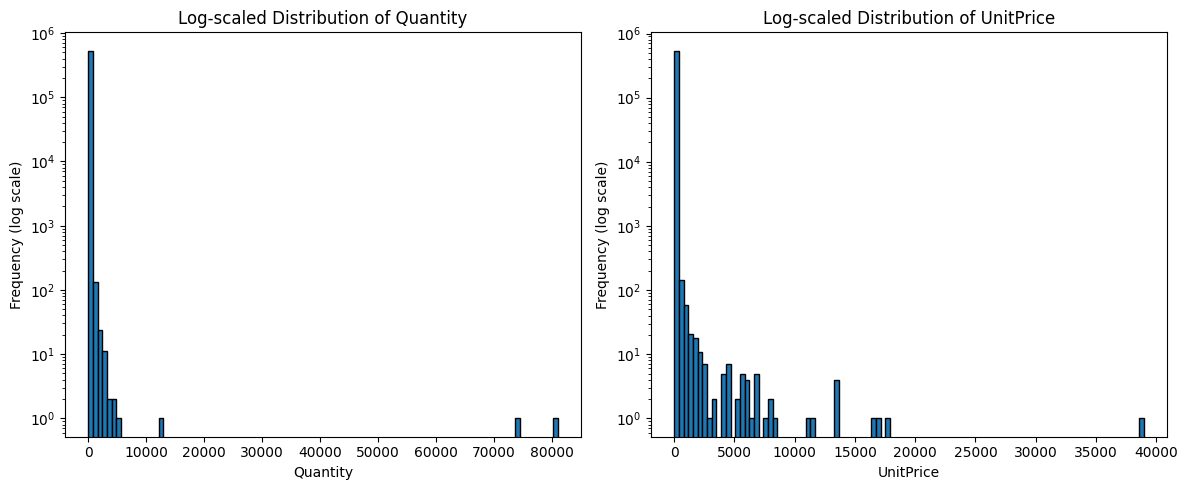

In [6]:
import matplotlib.pyplot as plt

cols = ["Quantity", "UnitPrice"]

plt.figure(figsize=(12,5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    plt.hist(df[col][df[col] > 0], bins=100, edgecolor="black", log=True)  # exclude <=0 for log
    plt.title(f"Log-scaled Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()


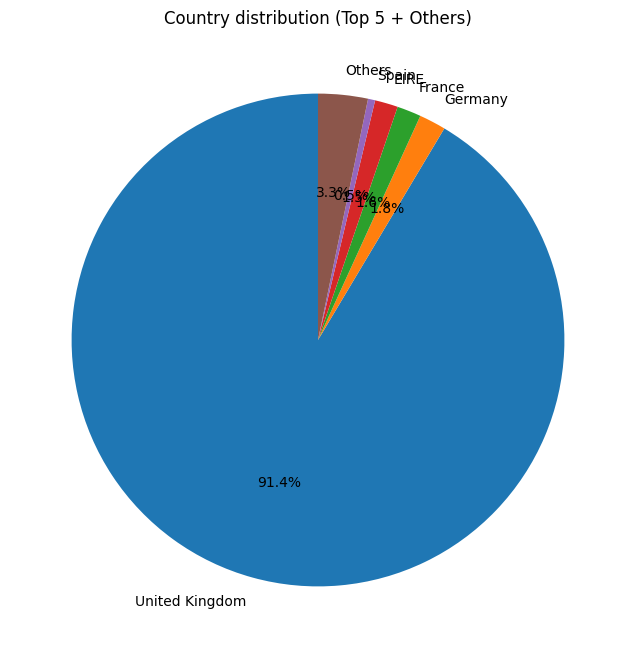

In [7]:
col = "Country"

counts = df[col].value_counts()

top_n = 5
top_counts = counts.head(top_n)
others_count = counts[top_n:].sum()

counts_for_plot = pd.concat([top_counts, pd.Series({"Others": others_count})])

plt.figure(figsize=(8,8))
plt.pie(
    counts_for_plot,
    labels=counts_for_plot.index,
    autopct=lambda p: f"{p:.1f}%" if p > 0 else "",
    startangle=90
)
plt.title(f"{col} distribution (Top {top_n} + Others)")
plt.show()

In [8]:
df = df.dropna(subset=["CustomerID"])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
print(df["Quantity"].min())
print(df["UnitPrice"].min())

-80995
0.0


In [10]:
negative_qty = df[df["Quantity"] < 0]

negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [11]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [13]:
countries = df["Country"].unique()

country_dfs = {country: df[df["Country"] == country].reset_index(drop=True) 
               for country in countries}

In [14]:
uk_df = country_dfs["United Kingdom"]
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
354340,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
354341,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
354342,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
354343,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


##  Feature Engineering

In [15]:
uk_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [16]:
# Ensure InvoiceDate is datetime
uk_df["InvoiceDate"] = pd.to_datetime(uk_df["InvoiceDate"])

# Add a 'TotalValue' column (Quantity × UnitPrice)
uk_df["TotalValue"] = uk_df["Quantity"] * uk_df["UnitPrice"]

# Use max date in dataset as reference point for recency
max_date = uk_df["InvoiceDate"].max()

# Group by CustomerID and calculate RFM
rfm = uk_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (max_date - x.max()).days,   # Recency
    "InvoiceNo": "nunique",                              # Frequency
    "TotalValue": "sum"                                  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,11,4196.01
2,12748.0,0,210,33719.73
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


In [17]:
print(f"Shape: {rfm.shape}")

Shape: (3921, 4)


In [18]:
rfm.describe(include='all')

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.188472,4.246111,1863.910113
std,1576.823683,99.528995,7.205750,7481.922217
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,1.000000,300.040000
50%,15569.000000,50.000000,2.000000,651.820000
75%,16913.000000,142.000000,5.000000,1575.890000
max,18287.000000,373.000000,210.000000,259657.300000


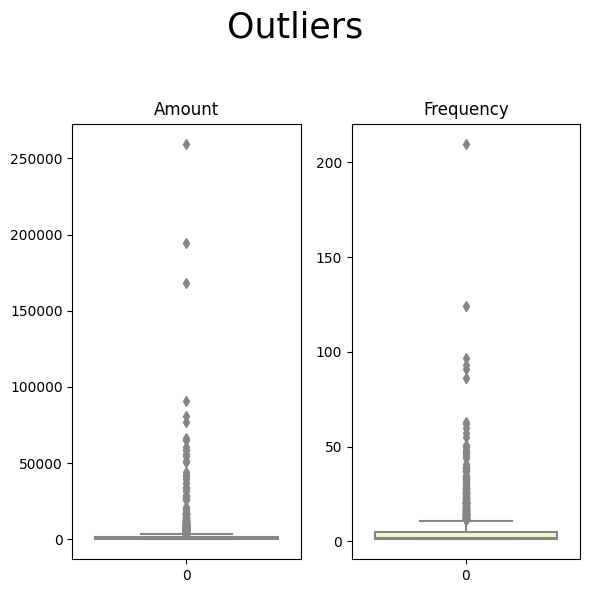

In [19]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=rfm['Monetary'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=rfm['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [20]:
from sklearn.ensemble import IsolationForest
rfm2 = rfm.copy()

In [21]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.05), max_features=1.0)
model.fit(rfm2)

IsolationForest(contamination=0.05, n_estimators=150)

In [22]:
scores=model.decision_function(rfm2)
anomaly=model.predict(rfm2)

rfm2['scores']=scores
rfm2['anomaly']=anomaly

anomaly = rfm2.loc[rfm2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 196


In [23]:
rfm2

,CustomerID,Recency,Frequency,Monetary,scores,anomaly
0,12346.0,325,1,77183.60,-0.167164,-1
1,12747.0,1,11,4196.01,0.010354,1
2,12748.0,0,210,33719.73,-0.221155,-1
3,12749.0,3,5,4090.88,0.038992,1
4,12820.0,2,4,942.34,0.083054,1
...,...,...,...,...,...,...
3916,18280.0,277,1,180.60,0.034859,1
3917,18281.0,180,1,80.82,0.057133,1
3918,18282.0,7,2,178.05,0.093360,1
3919,18283.0,3,16,2094.88,0.011811,1


In [24]:
rfm2 = rfm2.drop(anomaly_index, axis = 0).reset_index(drop=True)

In [25]:
rfm2

,CustomerID,Recency,Frequency,Monetary,scores,anomaly
0,12747.0,1,11,4196.01,0.010354,1
1,12749.0,3,5,4090.88,0.038992,1
2,12820.0,2,4,942.34,0.083054,1
3,12821.0,213,1,92.72,0.061505,1
4,12822.0,70,2,948.88,0.096172,1
...,...,...,...,...,...,...
3720,18280.0,277,1,180.60,0.034859,1
3721,18281.0,180,1,80.82,0.057133,1
3722,18282.0,7,2,178.05,0.093360,1
3723,18283.0,3,16,2094.88,0.011811,1


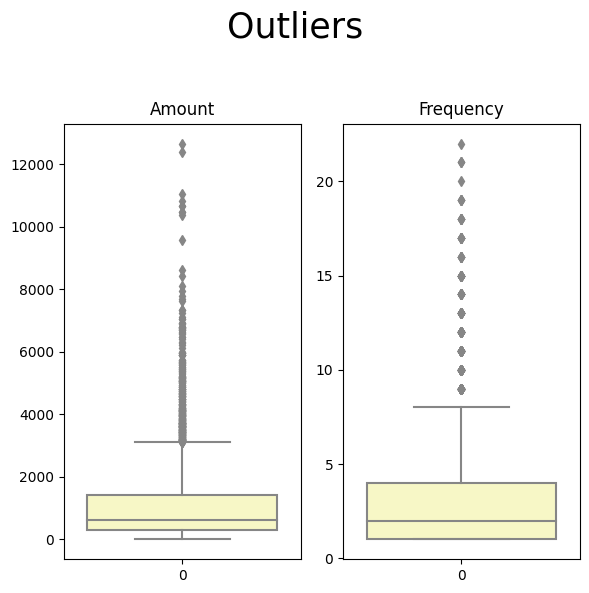

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=rfm2['Monetary'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=rfm2['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [27]:
rfm2.drop(['CustomerID','scores', 'anomaly'], axis = 1, inplace =True)

In [28]:
rfm2

,Recency,Frequency,Monetary
0,1,11,4196.01
1,3,5,4090.88
2,2,4,942.34
3,213,1,92.72
4,70,2,948.88
...,...,...,...
3720,277,1,180.60
3721,180,1,80.82
3722,7,2,178.05
3723,3,16,2094.88


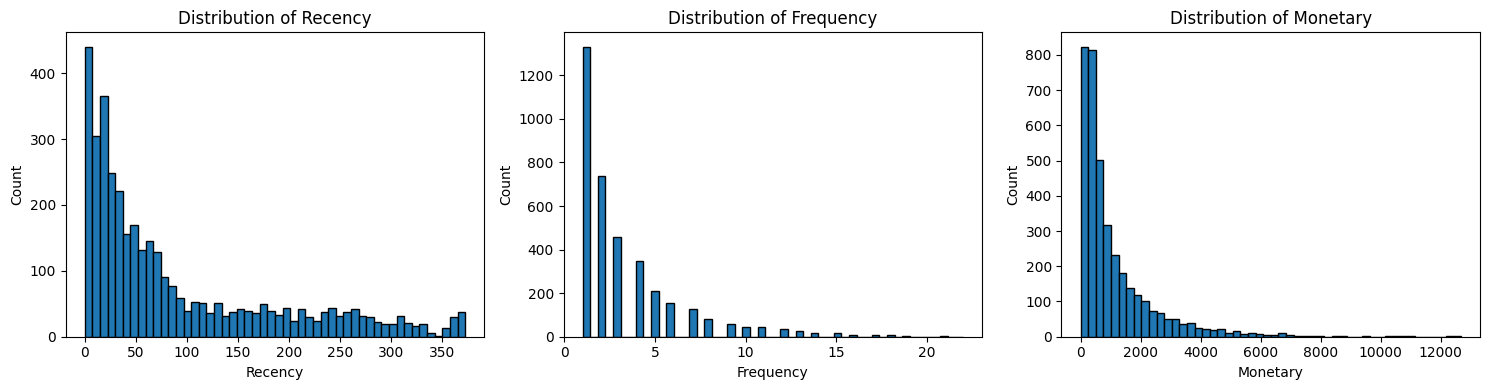

In [29]:
rfm_features = ["Recency", "Frequency", "Monetary"]

plt.figure(figsize=(15,4))
for i, col in enumerate(rfm_features, 1):
    plt.subplot(1, 3, i)
    plt.hist(rfm2[col], bins=50, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

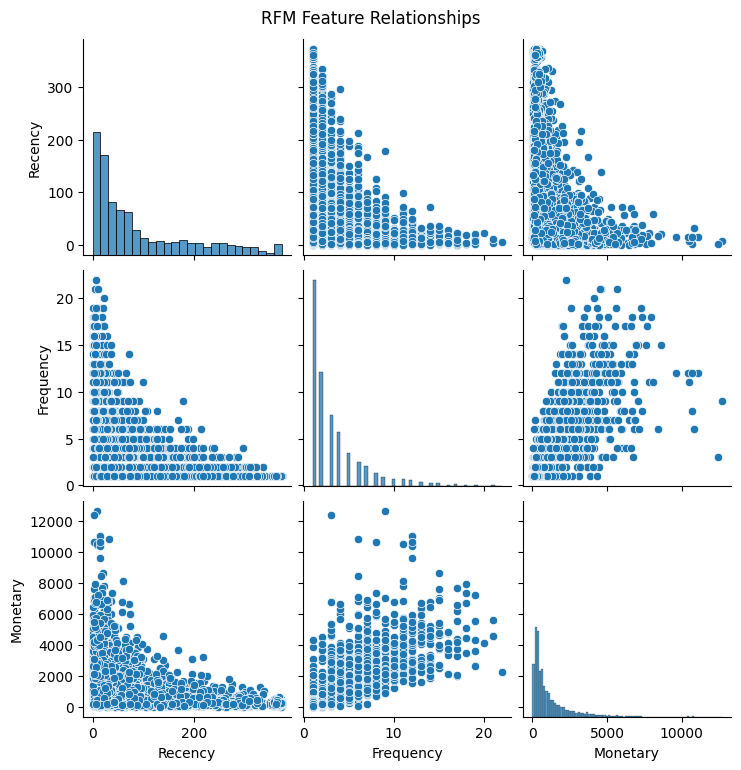

In [30]:
sns.pairplot(rfm2[["Recency", "Frequency", "Monetary"]])
plt.suptitle("RFM Feature Relationships", y=1.02)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm3=scaler.fit_transform(rfm2)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm2)
rfm_scaled = pd.DataFrame(rfm_scaled, 
                          columns=rfm2.columns, 
                          index=rfm2.index)

In [33]:
rfm3

array([[-0.92748262,  2.43584812,  2.29612998],
       [-0.90683883,  0.52977693,  2.21791582],
       [-0.91716073,  0.21209839, -0.12452138],
       ...,
       [-0.86555125, -0.42325867, -0.69313456],
       [-0.90683883,  4.02424079,  0.73294035],
       [-0.50428489, -0.10558014,  0.54129222]])

In [34]:
rfm_scaled

,Recency,Frequency,Monetary
0,-0.927483,2.435848,2.296130
1,-0.906839,0.529777,2.217916
2,-0.917161,0.212098,-0.124521
3,1.260759,-0.740937,-0.756618
4,-0.215272,-0.423259,-0.119656
...,...,...,...
3720,1.921361,-0.740937,-0.691237
3721,0.920137,-0.740937,-0.765471
3722,-0.865551,-0.423259,-0.693135
3723,-0.906839,4.024241,0.732940


# Apply and Analyze Clustering Methods and Clustering Evaluation

##  K-Means Clustering

### Finding the optimal number of clusters

#### Elbow Method

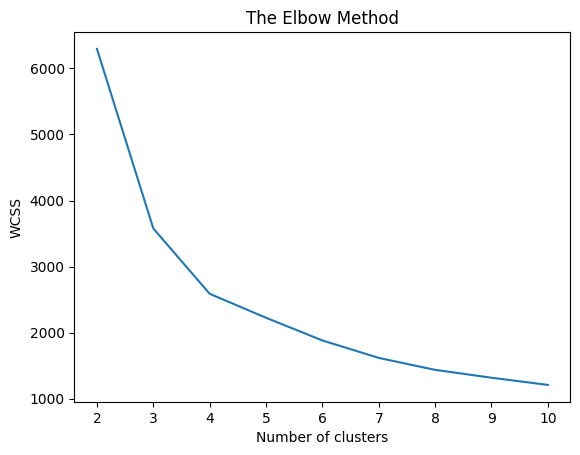

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

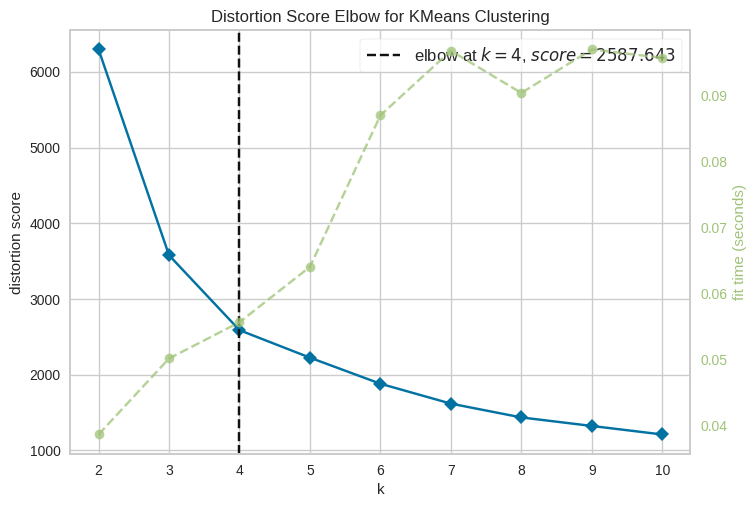

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(rfm_scaled) 
visualizer.show()   

#### Silhouette Score

In [37]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.501
k=3, silhouette score=0.494
k=4, silhouette score=0.470
k=5, silhouette score=0.412
k=6, silhouette score=0.399
k=7, silhouette score=0.392
k=8, silhouette score=0.390
k=9, silhouette score=0.369
k=10, silhouette score=0.370


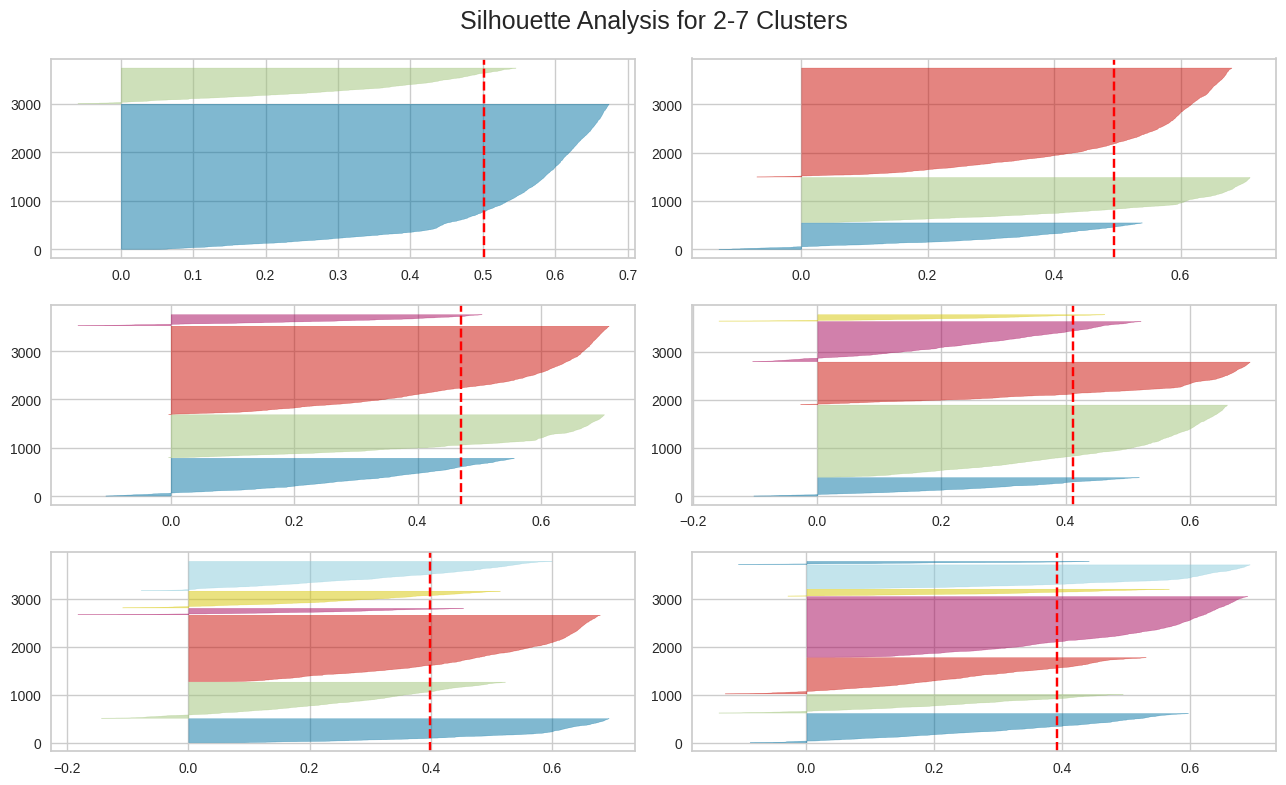

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_scaled)

Optimal number of clusters seems to be 4.

### KMeans with K as 4

In [39]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 22)
y_kmeans = kmeans.fit_predict(rfm_scaled)

In [40]:
df_kmeans = rfm_scaled.copy()
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

Cluster
2    1821
1     890
0     783
3     231
Name: count, dtype: int64

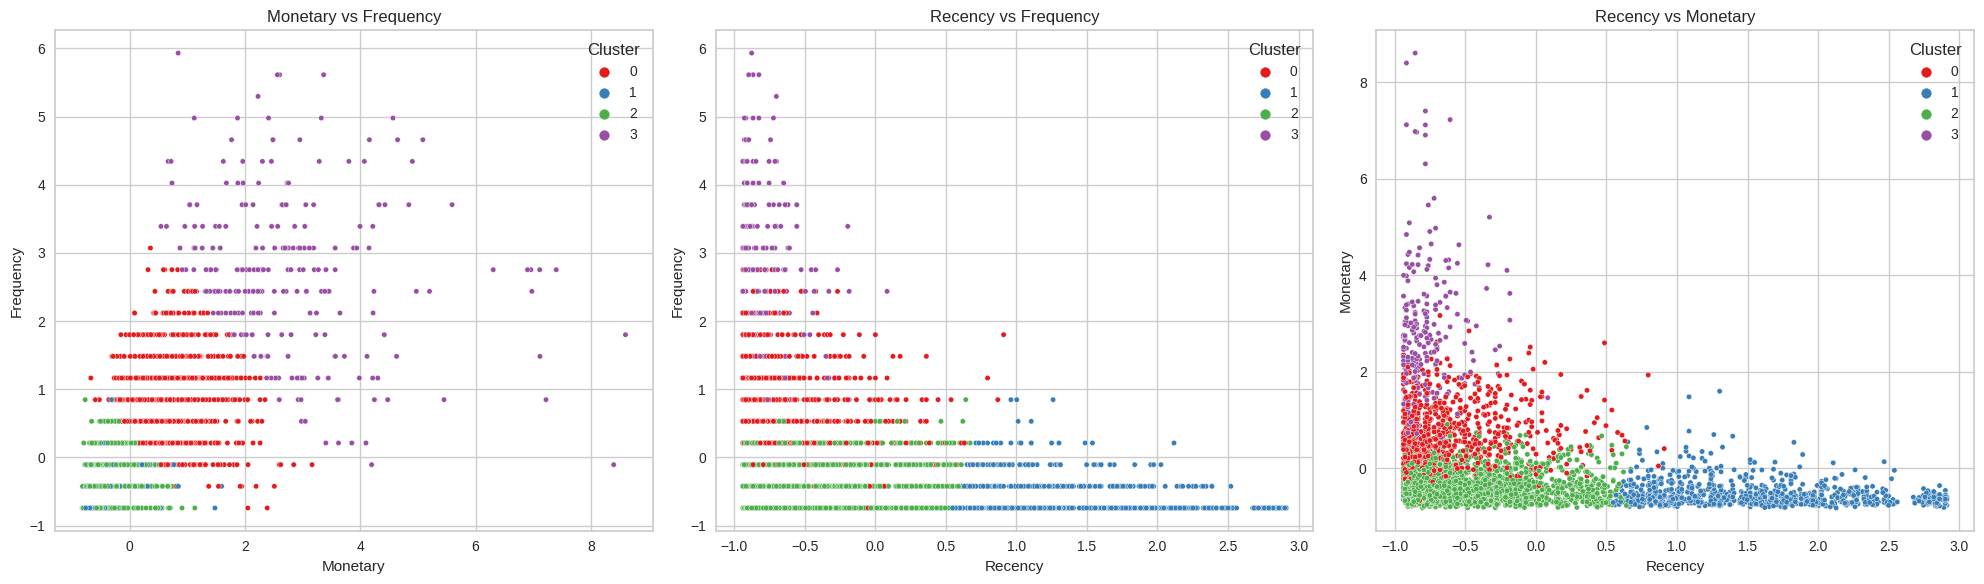

In [41]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Monetary vs Frequency
sns.scatterplot(data=df_kmeans, x='Monetary', y='Frequency', 
                hue='Cluster', s=15, palette="Set1", ax=axes[0])
axes[0].set_title("Monetary vs Frequency")

# Plot 2: Recency vs Frequency
sns.scatterplot(data=df_kmeans, x='Recency', y='Frequency', 
                hue='Cluster', s=15, palette="Set1", ax=axes[1])
axes[1].set_title("Recency vs Frequency")

# Plot 3: Recency vs Monetary
sns.scatterplot(data=df_kmeans, x='Recency', y='Monetary', 
                hue='Cluster', s=15, palette="Set1", ax=axes[2])
axes[2].set_title("Recency vs Monetary")

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
import plotly.express as px

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_kmeans, 
    x='Recency', 
    y='Frequency', 
    z='Monetary',
    color='Cluster',        # cluster color
    size_max=10,
    opacity=0.7,
    labels={'Recency':'Recency', 'Frequency':'Frequency', 'Monetary':'Monetary'},
    title="Interactive 3D RFM Clustering"
)

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    )
)

fig.show()

### Cluster Centroids and Customer Segments

In [43]:
centroids_scaled = kmeans.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids, columns=rfm_scaled.columns)
centroids_df['Cluster'] = range(4)

print("Cluster centroids (original RFM scale):")
centroids_df

Cluster centroids (original RFM scale):


,Recency,Frequency,Monetary,Cluster
0,31.475703,5.942455,2062.274757,0
1,244.506187,1.426322,384.401047,1
2,50.915980,2.057661,574.383736,2
3,16.051502,11.806867,4863.933262,3


| Cluster | Recency | Frequency | Monetary | Interpretation                 |
| ------- | ------- | --------- | -------- | ------------------------------ |
| 0       | High    | Medium    | Medium   | Active mid-value customers     |
| 1       | Low     | Low       | Low      | Inactive customers             |
| 2       | Medium  | Low       | Low      | New customers                  |
| 3       | High    | High      | High     | Loyal & high spending customers|

### Evaluation

In [44]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

sil_score = silhouette_score(rfm_scaled, y_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")


centroids = kmeans.cluster_centers_

intra_distances = []
for i in range(kmeans.n_clusters):
    cluster_points = rfm_scaled[y_kmeans == i]
    centroid = centroids[i]
    intra_dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    intra_distances.append(intra_dist)

print(f"Average intra-cluster distances per cluster: {intra_distances}")

inter_distances = cdist(centroids, centroids)
inter_distances = inter_distances[np.triu_indices_from(inter_distances, k=1)]
print(f"Average inter-cluster distance: {np.mean(inter_distances):.3f}")

calinski_harabasz_index = calinski_harabasz_score(rfm_scaled, y_kmeans)
print(f"Calinski harabasz Index: {calinski_harabasz_index:.3f}")

davies_bouldin_index = davies_bouldin_score(rfm_scaled, y_kmeans)
print(f"Davies bouldin Index: {davies_bouldin_index:.3f}")

Silhouette Score: 0.470
Average intra-cluster distances per cluster: [0.846126745850019, 0.6563126069880301, 0.5507120150561227, 1.5593583706071208]
Average inter-cluster distance: 3.183
Calinski harabasz Index: 4116.180
Davies bouldin Index: 0.787


##  Hierarchical Clustering (AGNES)

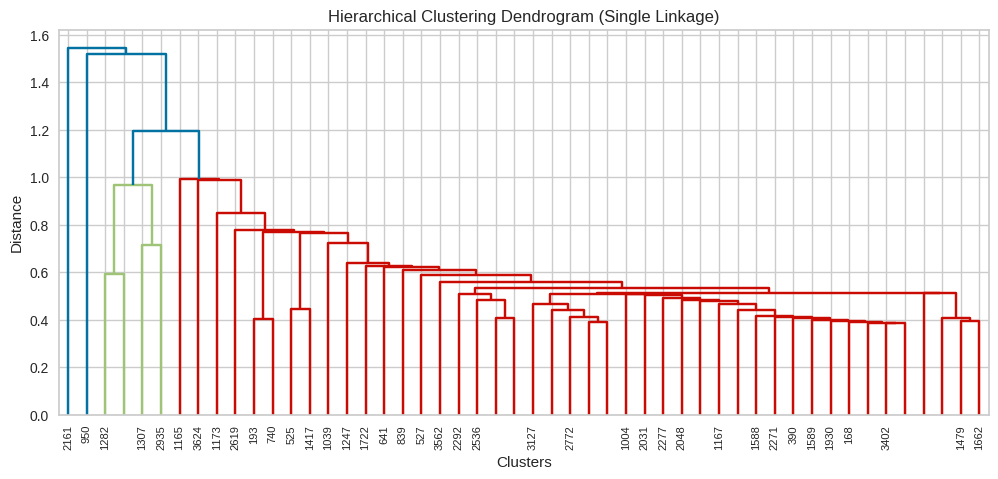

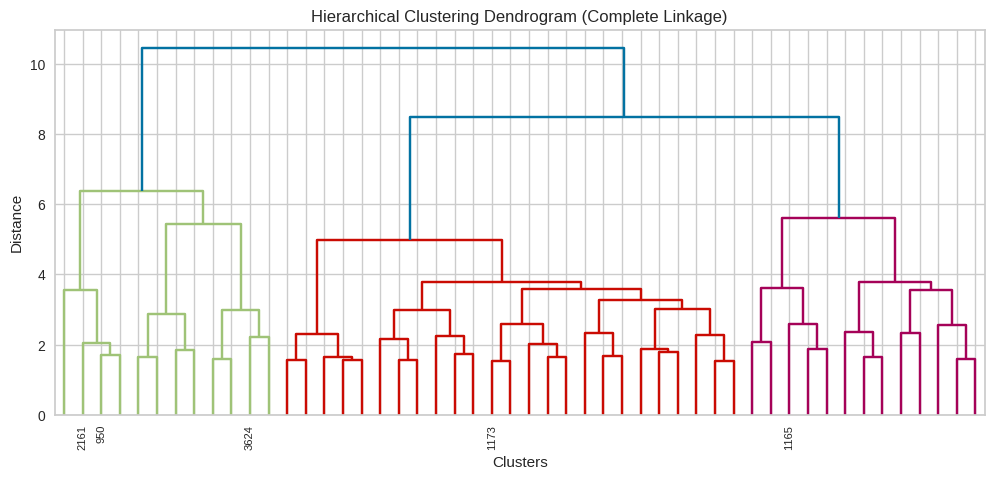

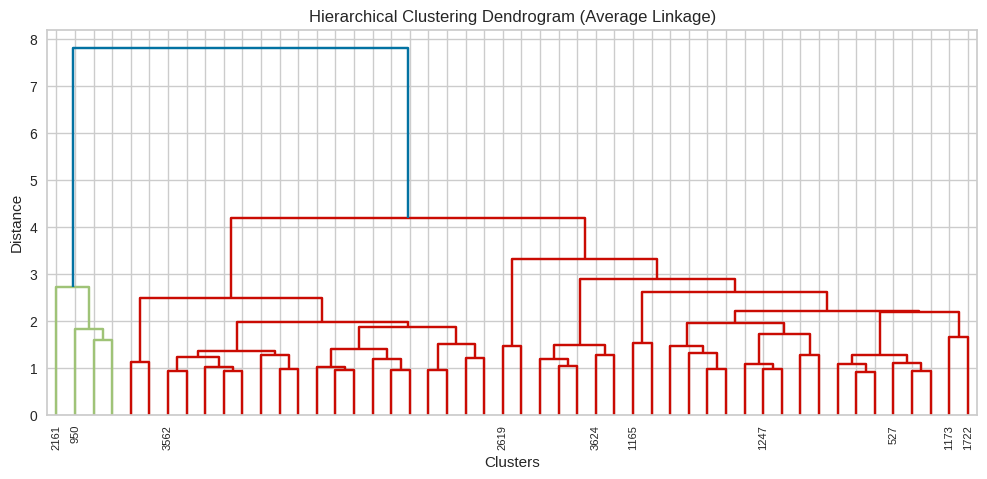

In [52]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Single Linkage
plt.figure(figsize=(12, 5))
dend_single = sch.dendrogram(
    sch.linkage(rfm_scaled, method='single'),
    truncate_mode="lastp",  # show only last p clusters
    p=50,                   # number of clusters shown (tune this)
    show_leaf_counts=False, # hide counts on leaves
)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()

# Complete Linkage
plt.figure(figsize=(12, 5))
dend_complete = sch.dendrogram(
    sch.linkage(rfm_scaled, method='complete'),
    truncate_mode="lastp",
    p=50,
    show_leaf_counts=False,
)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()

# Average Linkage
plt.figure(figsize=(12, 5))
dend_average = sch.dendrogram(
    sch.linkage(rfm_scaled, method='average'),
    truncate_mode="lastp",
    p=50,
    show_leaf_counts=False,
)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

# Single Linkage
hc_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = hc_single.fit_predict(rfm_scaled)

# Complete Linkage
hc_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = hc_complete.fit_predict(rfm_scaled)

# Average Linkage
hc_average = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_average = hc_average.fit_predict(rfm_scaled)

In [47]:
df_agnes = rfm_scaled.copy()
df_agnes['HC_Single'] = labels_single
df_agnes['HC_Complete'] = labels_complete
df_agnes['HC_Average'] = labels_average

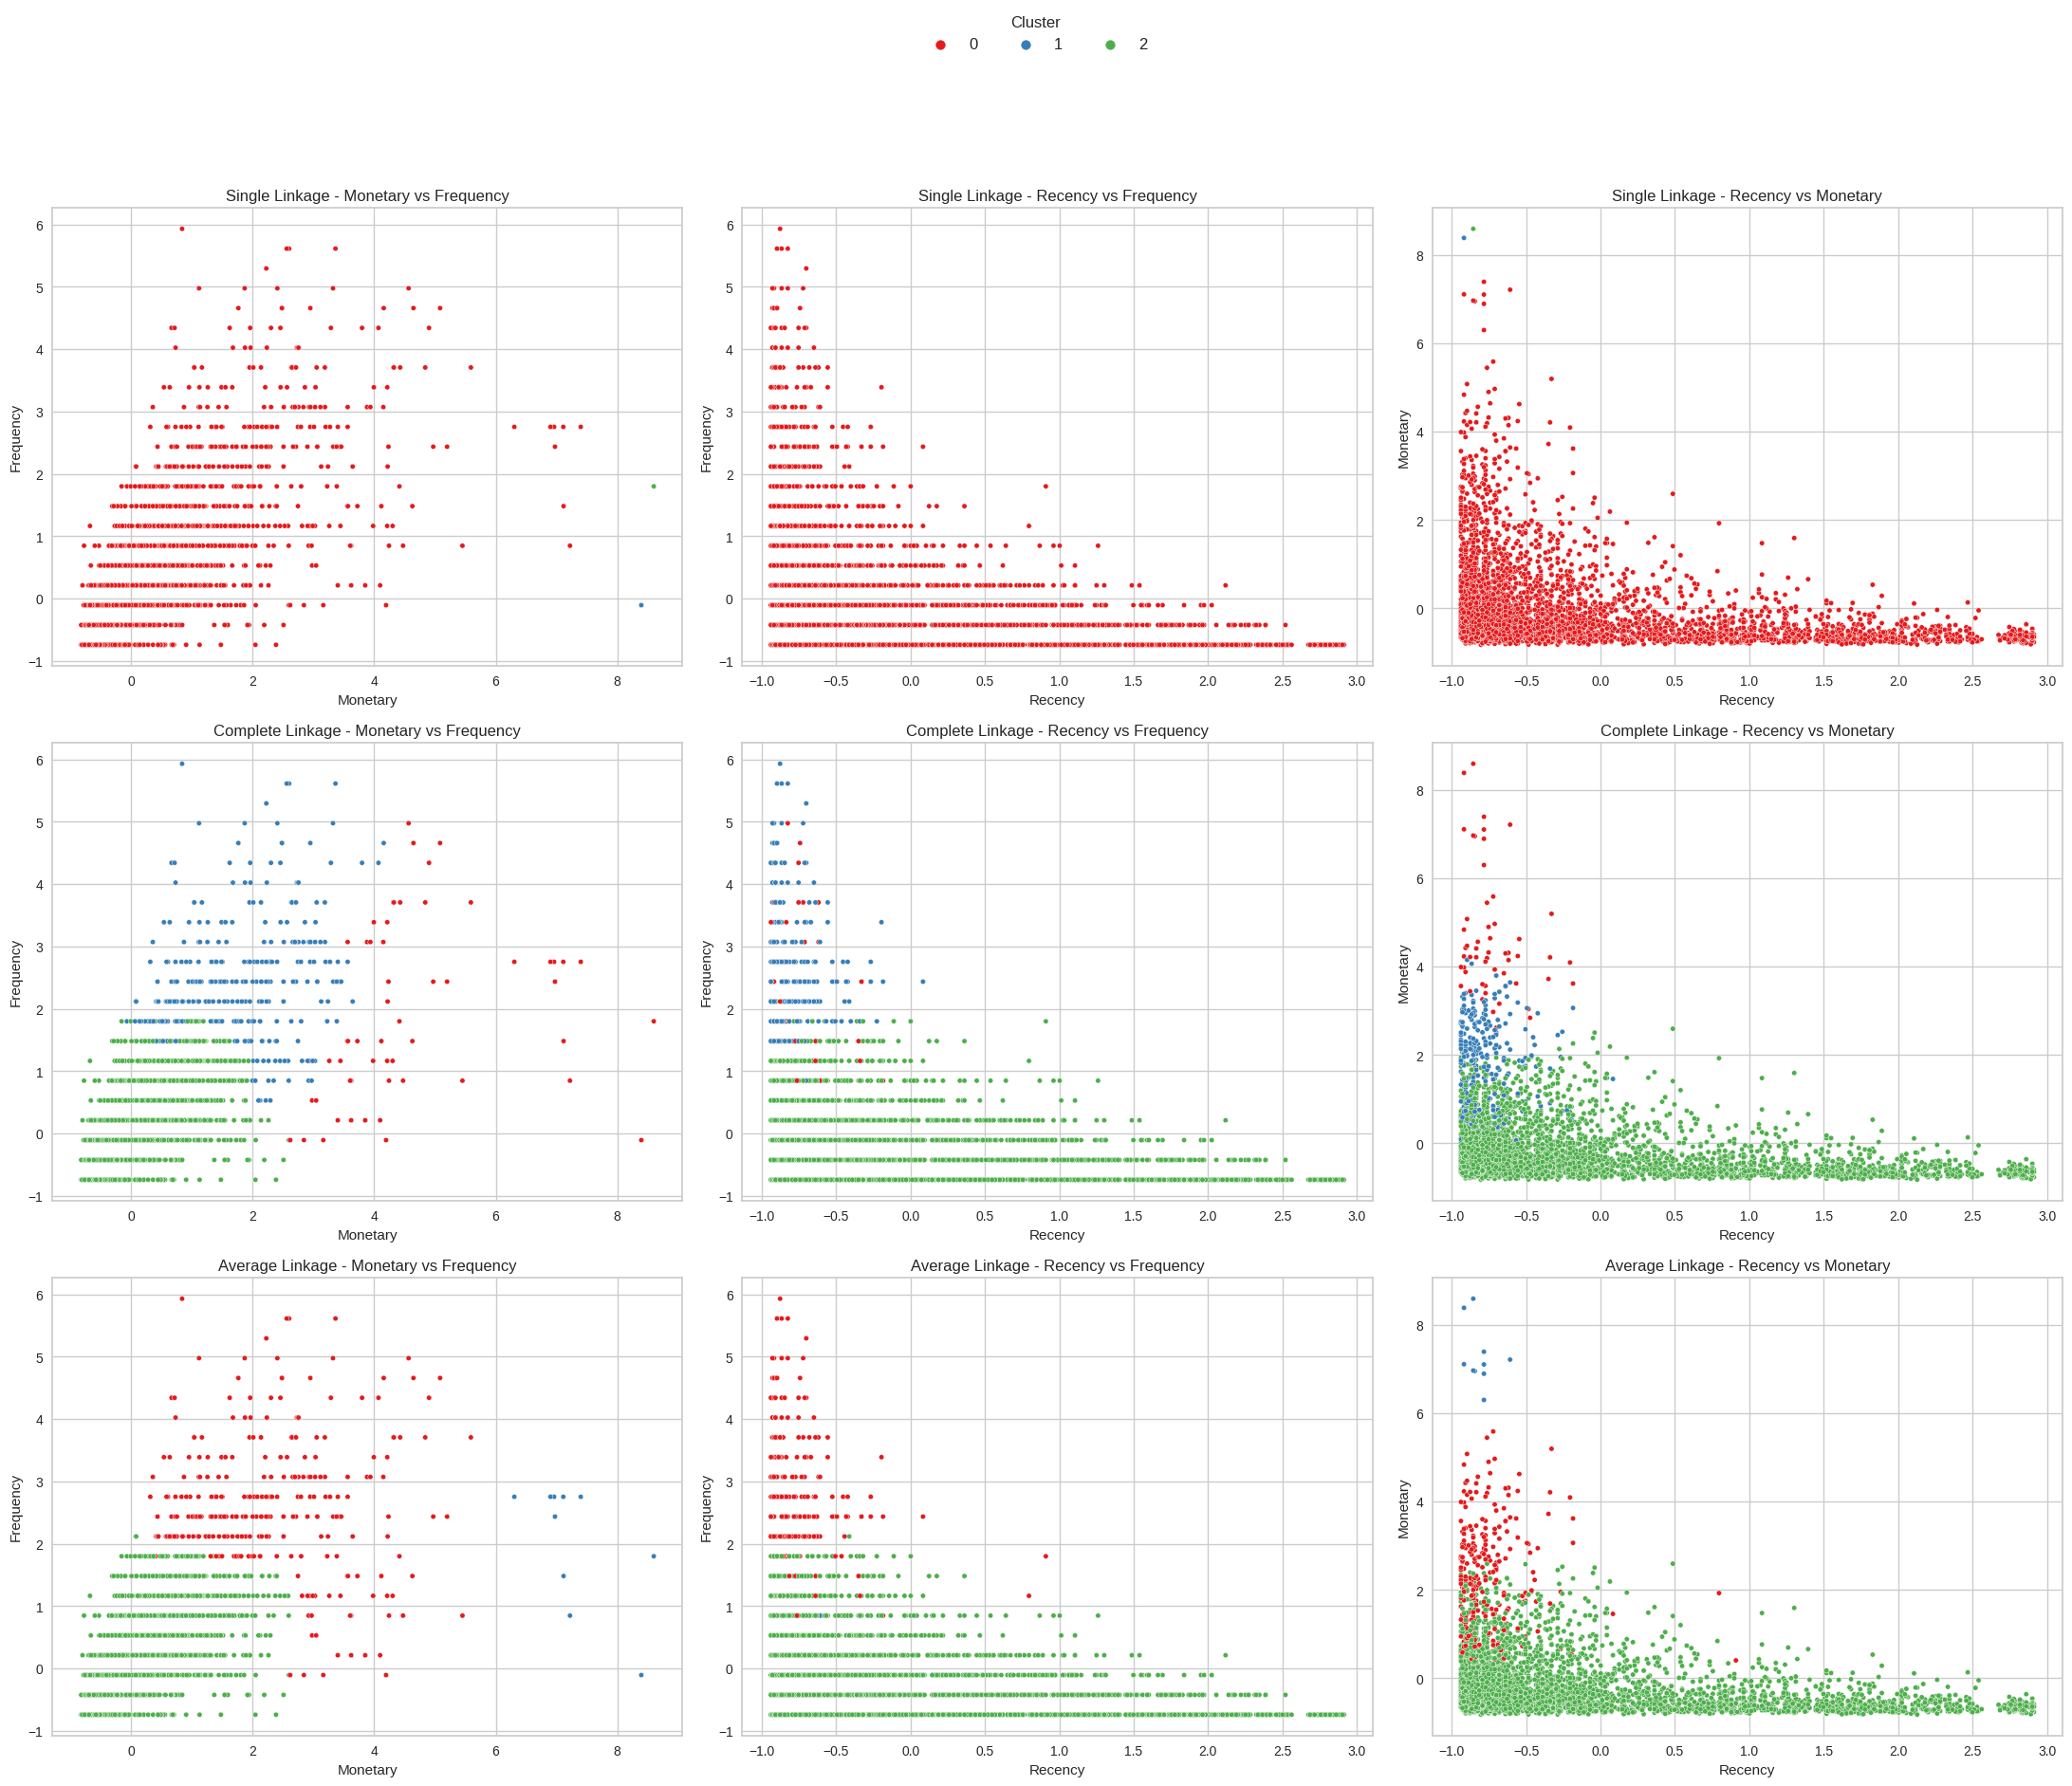

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(22, 18))

methods = ["HC_Single", "HC_Complete", "HC_Average"]
titles = ["Single Linkage", "Complete Linkage", "Average Linkage"]
pairs = [
    ("Monetary", "Frequency", "Monetary vs Frequency"),
    ("Recency", "Frequency", "Recency vs Frequency"),
    ("Recency", "Monetary", "Recency vs Monetary")
]

# Loop through each method and pair of features
for i, method in enumerate(methods):
    for j, (x, y, title) in enumerate(pairs):
        sns.scatterplot(
            data=df_agnes, x=x, y=y,
            hue=method, palette="Set1", s=15, ax=axes[i, j]
        )
        axes[i, j].set_title(f"{titles[i]} - {title}")
        axes[i, j].legend([],[], frameon=False) 

# Create one global legend outside the subplots
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Cluster", loc="upper center",
    bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=12
)

plt.tight_layout(rect=[0,0,1,0.95]) 
plt.show()

In [49]:
df_agnes

,Recency,Frequency,Monetary,HC_Single,HC_Complete,HC_Average
0,-0.927483,2.435848,2.296130,0,1,0
1,-0.906839,0.529777,2.217916,0,1,2
2,-0.917161,0.212098,-0.124521,0,2,2
3,1.260759,-0.740937,-0.756618,0,2,2
4,-0.215272,-0.423259,-0.119656,0,2,2
...,...,...,...,...,...,...
3720,1.921361,-0.740937,-0.691237,0,2,2
3721,0.920137,-0.740937,-0.765471,0,2,2
3722,-0.865551,-0.423259,-0.693135,0,2,2
3723,-0.906839,4.024241,0.732940,0,1,0


### Evaluation

In [50]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

# Features
X = df_agnes[["Recency", "Frequency", "Monetary"]].values

methods = ["HC_Single", "HC_Complete", "HC_Average"]

for method in methods:
    print(f"\n--- Evaluation for {method} ---")
    labels = df_agnes[method].values
    
    # 1. Silhouette Score
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score: {sil_score:.3f}")
    
    # 2. Intra-cluster distance (within clusters)
    intra_distances = []
    centroids = []
    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        intra_dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        intra_distances.append(intra_dist)
    
    centroids = np.array(centroids)
    print(f"Average intra-cluster distances per cluster: {np.round(intra_distances, 3)}")
    
    # 3. Inter-cluster distance (between centroids)
    inter_distances = cdist(centroids, centroids)
    inter_distances = inter_distances[np.triu_indices_from(inter_distances, k=1)]
    print(f"Average inter-cluster distance: {np.mean(inter_distances):.3f}")
    
    # 4. Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(X, labels)
    print(f"Calinski-Harabasz Index: {calinski_harabasz_index:.3f}")
    
    # 5. Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(X, labels)
    print(f"Davies-Bouldin Index: {davies_bouldin_index:.3f}")


--- Evaluation for HC_Single ---
Silhouette Score: 0.752
Average intra-cluster distances per cluster: [1.432 0.    0.   ]
Average inter-cluster distance: 6.400
Calinski-Harabasz Index: 25.209
Davies-Bouldin Index: 0.167

--- Evaluation for HC_Complete ---
Silhouette Score: 0.528
Average intra-cluster distances per cluster: [1.812 1.246 1.163]
Average inter-cluster distance: 3.950
Calinski-Harabasz Index: 1325.920
Davies-Bouldin Index: 0.921

--- Evaluation for HC_Average ---
Silhouette Score: 0.571
Average intra-cluster distances per cluster: [1.439 1.038 1.191]
Average inter-cluster distance: 5.598
Calinski-Harabasz Index: 1150.779
Davies-Bouldin Index: 0.616


## DBSCAN

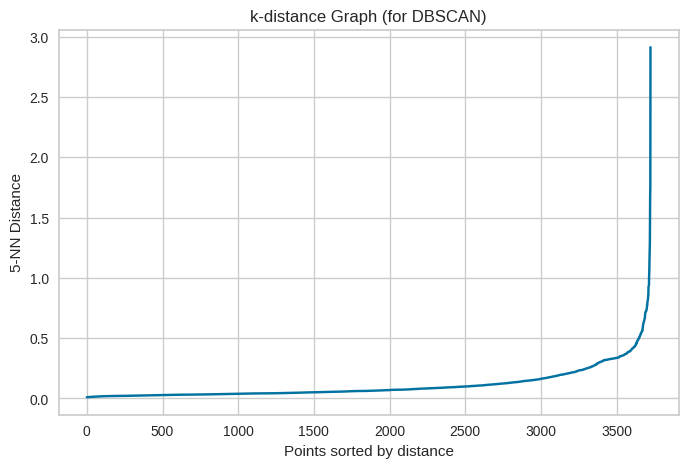

In [64]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples = 5  
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(rfm_scaled)
distances, indices = nbrs.kneighbors(rfm_scaled)

distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("k-distance Graph (for DBSCAN)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.show()

In [65]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(rfm_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Estimated number of clusters:", n_clusters)

Estimated number of clusters: 3


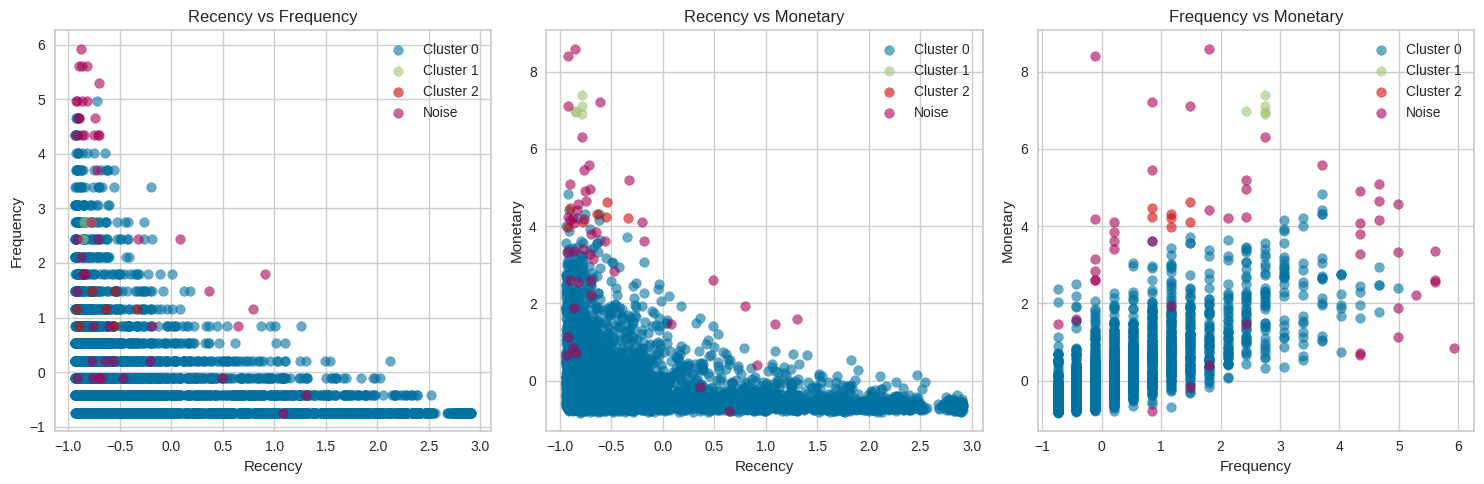

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

rfm_clusters = rfm_scaled.copy()
rfm_clusters['Cluster'] = labels

features = ['Recency', 'Frequency', 'Monetary']
pairs = [(0, 1), (0, 2), (1, 2)]

palette = sns.color_palette("Set1", len(set(labels)))

plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)
    for cluster in set(labels):
        subset = rfm_clusters[rfm_clusters['Cluster'] == cluster]
        plt.scatter(
            subset[features[x]],
            subset[features[y]],
            label=f"Cluster {cluster}" if cluster != -1 else "Noise",
            alpha=0.6
        )
    plt.xlabel(features[x])
    plt.ylabel(features[y])
    plt.title(f"{features[x]} vs {features[y]}")
    plt.legend()

plt.tight_layout()
plt.show()

### Evaluation

In [68]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

mask = labels != -1
X_clustered = rfm_scaled[mask]
labels_clustered = labels[mask]

# 1. Silhouette Score
if len(set(labels_clustered)) > 1:
    sil_score = silhouette_score(X_clustered, labels_clustered)
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette Score: Cannot compute (only 1 cluster found)")

# 2. Calinski-Harabasz Index
if len(set(labels_clustered)) > 1:
    calinski_harabasz_index = calinski_harabasz_score(X_clustered, labels_clustered)
    print(f"Calinski-Harabasz Index: {calinski_harabasz_index:.3f}")
else:
    print("Calinski-Harabasz Index: Cannot compute (only 1 cluster found)")

# 3. Davies-Bouldin Index
if len(set(labels_clustered)) > 1:
    davies_bouldin_index = davies_bouldin_score(X_clustered, labels_clustered)
    print(f"Davies-Bouldin Index: {davies_bouldin_index:.3f}")
else:
    print("Davies-Bouldin Index: Cannot compute (only 1 cluster found)")

# 4. Intra-cluster distances (DBSCAN version)
intra_distances = []
for cluster in set(labels_clustered):
    cluster_points = X_clustered[labels_clustered == cluster]
    centroid = np.mean(cluster_points, axis=0)  # compute centroid manually
    intra_dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    intra_distances.append(intra_dist)

print(f"Average intra-cluster distances per cluster: {intra_distances}")

# 5. Inter-cluster distances (DBSCAN version)
centroids = []
for cluster in set(labels_clustered):
    cluster_points = X_clustered[labels_clustered == cluster]
    centroids.append(np.mean(cluster_points, axis=0))
centroids = np.array(centroids)

if len(centroids) > 1:
    from scipy.spatial.distance import cdist
    inter_distances = cdist(centroids, centroids)
    inter_distances = inter_distances[np.triu_indices_from(inter_distances, k=1)]
    print(f"Average inter-cluster distance: {np.mean(inter_distances):.3f}")
else:
    print("Average inter-cluster distance: Cannot compute (only 1 cluster found)")

Silhouette Score: 0.569
Calinski-Harabasz Index: 85.727
Davies-Bouldin Index: 0.318
Average intra-cluster distances per cluster: [1.3641413961603224, 0.20120630343828766, 0.3419044933716526]
Average inter-cluster distance: 5.140
